In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

1.1 Biến đổi cường độ ảnh

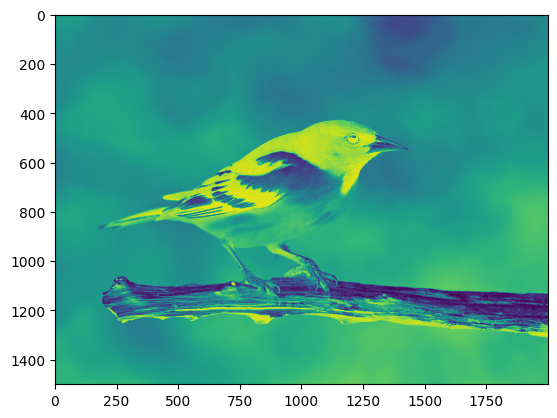

In [2]:
# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# inversion operation
im_2 = 255 - im_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

1.2 Thay đổi chất lượng ảnh với Power law

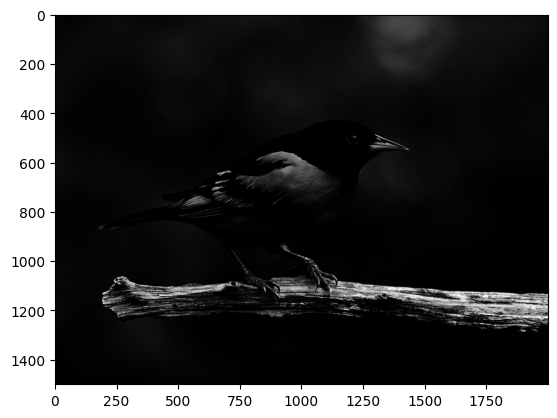

In [ ]:
# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# init gamma
gamma = 5

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# b3 is normalized
b3 = b1 / b2

# Avoid log(0) by adding a small value
epsilon = 1e-8
b3 = np.clip(b3, epsilon, 1.0)  # đảm bảo không có giá trị 0

# b2 gamma correction exponent is computed
b2 = np.log(b3) * gamma

# gamma correction is computed
c = np.exp(b2) * 255.0

# c1 is converted to type int
c1 = np.clip(c, 0, 255).astype(np.uint8)  # ép về uint8, giới hạn giá trị từ 0–255

# convert back to image
d = Image.fromarray(c1)

# show images
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformation

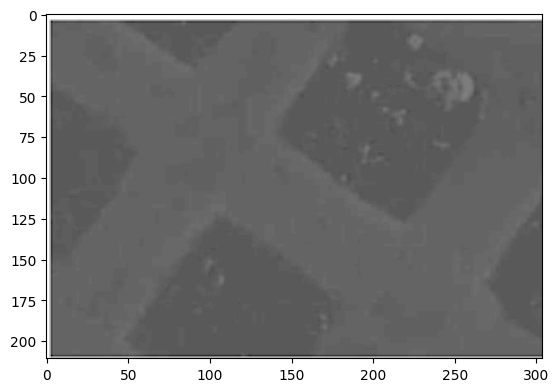

In [7]:
# open a grayscale image
img = Image.open('nao.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# performing the log transformation
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# convert to uint8 to avoid TypeError
c1 = np.clip(c, 0, 255).astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

1.4 Histogram equalization

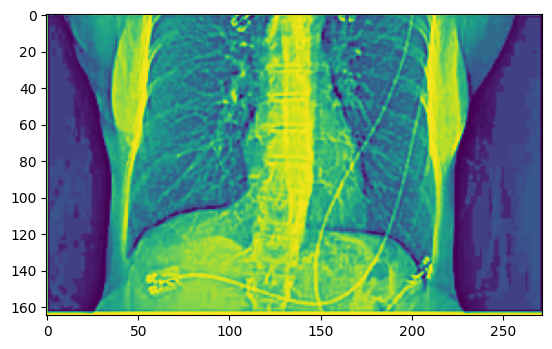

In [8]:
# open a grayscale image
img = Image.open('xuong.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray from 1D array
b1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf==0 is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[b1]

# im2 is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5 Thay đổi với Contrast Stretching 

14 255


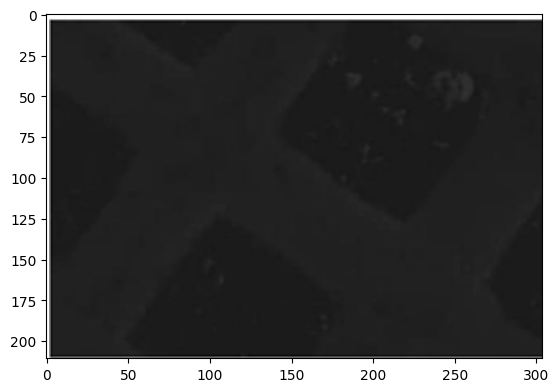

In [9]:
# open a grayscale image
img = Image.open('nao.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)

# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.1 Biến đổi  FastFourier

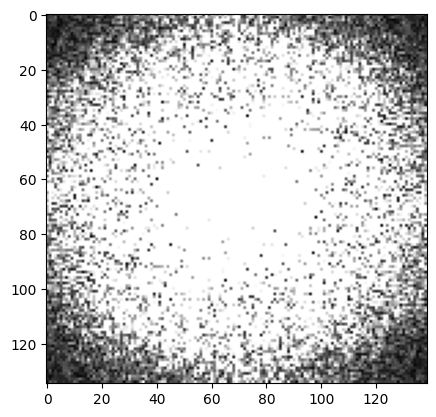

In [10]:
# open a grayscale image
img = Image.open('fast.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2 Lọc ảnh trong miền tần suất

Butterworth Lowpass Filter

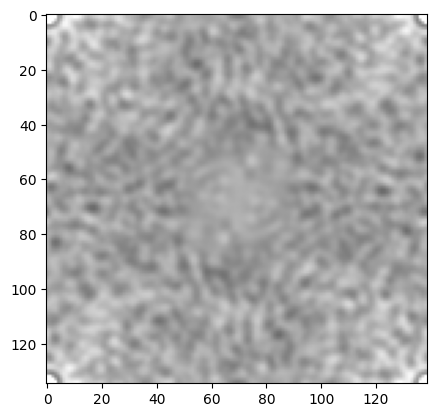

In [12]:
# open a grayscale image
img = Image.open('fast.png').convert('L')

# convert image into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
t1 = 1  # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)

# performing the convolution
con = d * H

# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
Image.fromarray(im1).show()
plt.imshow(im3)
plt.show()


Butterworth highpass Filter

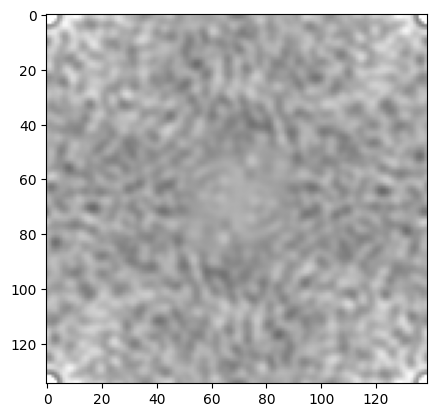

In [14]:
# open a grayscale image
img = Image.open('fast.png').convert('L')

# convert image l into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
t1 = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r/d_0)**t2)

# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)

# performing the convolution
con = d * H

# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()
